In [15]:
# Prolog - Auto Generated #
import os, uuid, matplotlib
%matplotlib inline
import matplotlib.pyplot
import pandas
pandas.options.mode.chained_assignment = None
import sys
sys.tracebacklimit = 0

# This dataset includes BIW, WD6, WD17, WD20 for 8 week period
orig_dataset = pandas.read_csv('input_df2.csv')
print(orig_dataset.shape)

(38255, 8)


Start table
Finish title
Finish orange
Start table
Finish title
Finish orange
Start table
Finish title
Finish orange


C:\Users\lali\AppData\Local\Temp\ipykernel_13644\1432207395.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(new_list)
C:\Users\lali\AppData\Local\Temp\ipykernel_13644\1432207395.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(new_list)
C:\Users\lali\AppData\Local\Temp\ipykernel_13644\1432207395.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(new_list)


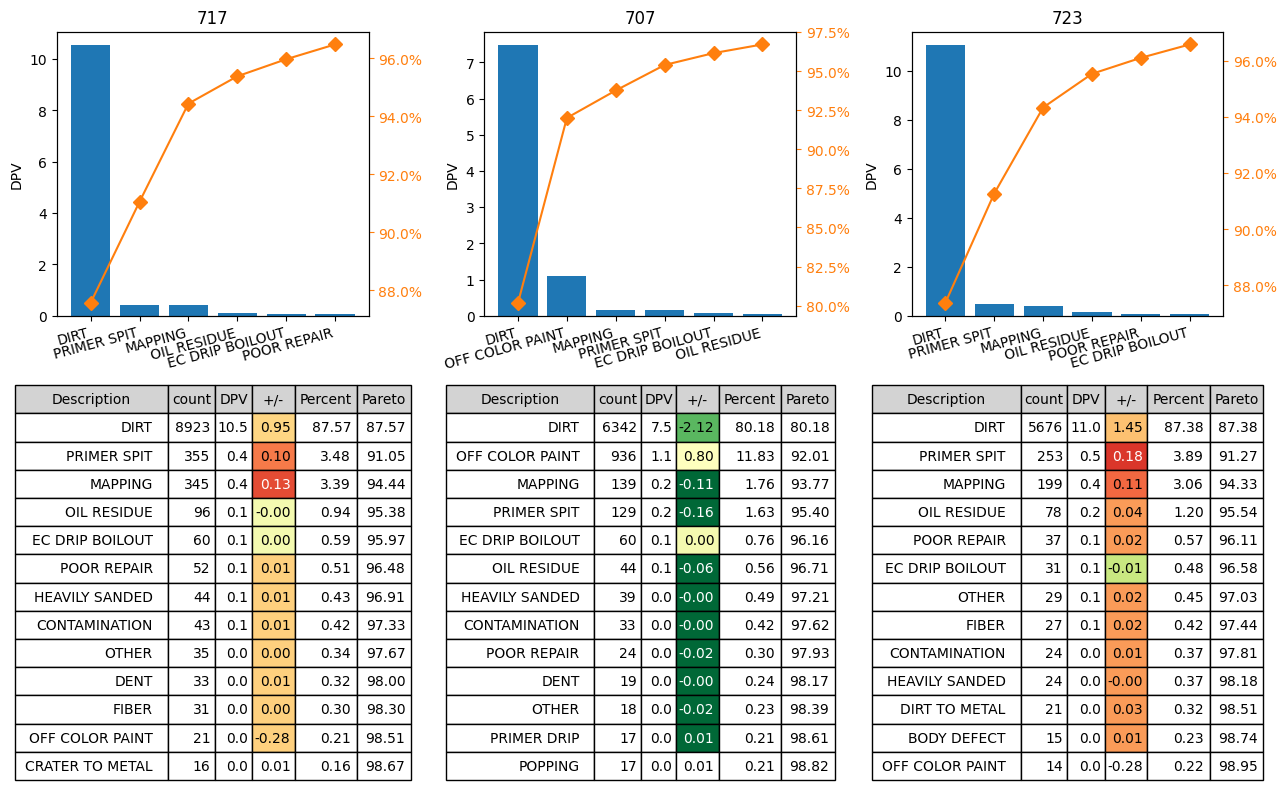

In [18]:
dataset = orig_dataset.copy()
# if(dataset.shape[0] > 0):
#     dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.date
#     latest_index = dataset['date'].value_counts().shape[0] - 1
#     latest_date = dataset['date'].value_counts().sort_index().index[latest_index]
#     dataset = dataset[dataset['date'] == latest_date]
dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
dataset = dataset.astype({'X Coordinate':'int'})
dataset = dataset.astype({'Y Coordinate':'int'})
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]
dataset = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp', 'X Coordinate', 'Y Coordinate'])

# print(dataset.head())
# print(dataset.shape)
# print(dataset['Topcoat Color'].value_counts())

ref = dataset['Graphical Code Loc Desc'].value_counts().rename_axis('Description').reset_index(name='count')
ref['DPV'] = ref['count'] / dataset['Rfid'].nunique()
# print(ref.head())
ref = dict(zip(ref.Description, ref.DPV))
ref['Total'] = 0
# print(ref)
# matplotlib.pyplot.show()
num_colors = 3
fig, ax = matplotlib.pyplot.subplots(2, num_colors)
# # Top 3 Color
#     # ax1 = matplotlib.pyplot.subplot(2,2, i + 1)
breakdown = "Topcoat Color"
for i in range(0,num_colors):
    d1 = dataset.loc[dataset[breakdown] == dataset[breakdown].value_counts().index[i]]
    # print(str(dataset['Topcoat Color'].value_counts().index[i]) + ", " + str(d1['Rfid'].nunique()))
    ax = matplotlib.pyplot.subplot(2,num_colors, i + 1 + num_colors)
    # # d3 = dataset.loc[dataset['Graphical Code Loc Desc'].str.contains(dataset['Graphical Code Loc Desc'].value_counts().index[0][0:3])]
    # # print(d3['Graphical Code Loc Desc'].value_counts().index[0])
    d2 = d1['Graphical Code Loc Desc'].value_counts().rename_axis('Description').reset_index(name='count')
    d2['DPV'] = d2['count'] / d1['Rfid'].nunique()
    d2['+/-'] = d2['DPV']
    for index, row in d2.iterrows():
        # row['+/-'] = row['+/-'] - ref[row['Description']]
        d2.at[index, '+/-'] = row['+/-'] - ref[row['Description']]
    d2['Percent'] = d2['count'] / d2['count'].sum() * 100
    d2['Pareto'] = d2['Percent'].cumsum()
    d2.update(d2[['Pareto']].applymap('{:,.2f}'.format))
    d2 = d2.head(13)
    # d2.loc['Total'] = d2.sum(numeric_only=True)

    # row  = d2.loc["Total"]
    # row['Description'] = "Total"
    # d2.loc["Total"] = row
    
    d2.update(d2[['DPV']].applymap('{:,.1f}'.format))
    d2.update(d2[['Percent']].applymap('{:,.2f}'.format))
    d2.update(d2[['+/-']].applymap('{:,.2f}'.format))
    d2['count'] = d2['count'].astype(int)
    # cols = d2.columns.tolist()
    # cols = cols[-1:] + cols[:-1]
    # d2 = d2[cols]
    ax.axis('off')
    ax.axis('tight')
    # print(d2)
    table = ax.table(cellText=d2.values, colLabels=d2.columns, loc='center', colColours=['lightgrey' for i in range(6)])
    for j in range(min(d2.shape[0] - 1, 12)):
        # print(str(d2['+/-'][j]) + "/" + str(d2['DPV'][j]))
        # print(table.get_celld()[(4, i)])
        # num = 0.99
        if(float(d2['DPV'][j]) != 0):
            if(float(d2['+/-'][j]) > 0):
                num = min(0.47 - abs(float(d2['+/-'][j]) / float(d2['DPV'][j])), 1)
            else:
                num = max(0.53 + abs(float(d2['+/-'][j]) / float(d2['DPV'][j])), 0)

            # num = min((float(d2['+/-'][j]) / float(d2['DPV'][j]), 1))
        if num < 0:
            num = 0.5
        # print(str(num))
        table.get_celld()[(j+1, 3)].set_facecolor(matplotlib.cm.RdYlGn(num))
        if(num < 0.15 or num > 0.85): 
            table.get_celld()[(j+1, 3)].set_text_props(color="#FFFFFF")
    
    # ax.title.set_text(dataset['Graphical Code Loc Desc'].value_counts().index[0])
    print("Start table")
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(d2.columns))))
    # table.set_fontsize(10)
    # ax = matplotlib.pyplot.subplot(1, 2, 2)
    ax2 = matplotlib.pyplot.subplot(2, num_colors, i+1)
    title = dataset[breakdown].value_counts().index[i]
    ax2.title.set_text(title)
    print("Finish title")

    d_bar = d1['Graphical Code Loc Desc'].value_counts().rename_axis('Description').reset_index(name='count')
    d_bar['DPV'] = d_bar['count'] / d1['Rfid'].nunique()
    d_bar['Percent'] = d_bar['count'] / d_bar['count'].sum() * 100
    d_bar['Pareto'] = d_bar['Percent'].cumsum()
    num_show = min(6, d_bar['DPV'].shape[0])
    d_bar = d_bar.head(num_show)
    nums = [i for i in range(num_show)]
    
    ax2.bar(nums, d_bar['DPV'])
    new_list = ["Empty"] 
    # new_list = []
    for d in d_bar['Description']:
        new_list.append(d)
    ax2.set_xticklabels(new_list)
    # ax2.set_xticks(nums, d_bar['Description'])
    ax2.set_ylabel("DPV")
    ax3 = ax2.twinx()
    ax3.plot(nums, d_bar['Pareto'], color="C1", marker="D", ms=7)
    ax3.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
    ax3.tick_params(axis="y", colors="C1")
    matplotlib.pyplot.setp(ax2.get_xticklabels(), rotation=15, horizontalalignment='right')
    print("Finish orange")

# fig = matplotlib.pyplot.gcf()
fig.set_figwidth(13)
fig.set_figheight(8)
fig.tight_layout()
# fig.set_dpi(130)
